# COGS 118A - Project Checkpoint

# Names

- Grant Duntugan
- Jesse Sanchez Villegas
- Isabella Anderson
- Trent Barker

# Abstract 
Telescopes are constantly collecting data and observing a variety of characteristics relating to stars in an effort to classify as many stars as possible. Stellar spectral types cannot be directly determined; rather, indirect measurements of temperature by B-V color and luminosity by apparent magnitude (and absolute magnitude when distance from Earth to the star is known) may be used to classify the type of star and the stage of its lifetime it is in.
Machine learning could play a key role in quickly predicting the type of star given B-V color, parallax, and apparent magnitude. In this problem, we seek to correctly classify a star as a dwarf star or giant star based off of features that will be outlined in the Data section. We plan to test the performance of a few models to determine which algorithm performs the best in correctly classifying spectral type.

Our goal of this project is to find a machine learning model that can accurately predict the type of star (giant or dwarf) given B-V color, apparent magnitude, and distance from the Earth to the star (parallax). Our performance/ success will be measured by comparing our predicted classifications to the true classifications.


# Background

Stellar Classification background: Stars are classified based upon spectral characteristics including temperature and luminosity. Stars are first characterized by the Morgan-Keenan system by letters O B A F G K M, with O stars being the hottest and M stars being the coolest. There are well-defined temperature ranges that distinguish the types of stars: O stars have temperatures above 25,000K, B stars have ranges between 10,000 - 25,000 K, A stars between 7,500 -10,000 K, F stars 6,000 - 7,500 K, G stars (including the Sun) between 5,000 - 6,000 K, K stars between 3,500 - 5,000 K, and M stars have temperatures below 3,500 K. Letters are further divided into 10 more subclasses between 0-9 by temperature. For example, an A0 star is hotter than an A9 star. Finally, stars are classified by luminosity class, which determines a specific stage in the star's lifetime. A supergiant is denoted by Ia0, Ia, Iab, or Ib. A giant star has luminosity class II, III, or IV. The vast majority of stars are Main Sequence stars, which are called dwarf stars. Main sequence stars are denoted by the letter V. Additional dwarf classes are subdwarfs (denoted VI) and white dwarfs (VII). For example, our Sun is a G2V star which means it is a relatively hot G star on the main sequence. Another example is an K0III which is a giant hot K star.

For the sake of this project, a 'dwarf' star includes main sequence stars, subdwarfs, and white dwarfs. A 'giant' star includes supergiants and giants. While it would be ideal to try to predict the exact luminosity class (i.e. predict if a star is specifically a hypergiant or white dwarf or main sequence star etc), there is a disproportionate amount of data for the different spectral types. Since it is estimated that 90% of the stars in the universe are main sequence stars, stellar datasets are dominated by luminosity class 'V' stars and there are far less instances of other classes such as subgiants, giants, subdwarfs, etc. Therefore it makes more sense to group stars into the classes 'giant' and 'dwarf' to be able to have much more data to train and test on rather than splitting the dataset into sub-sets of different luminosity classes.

Our aim to find a machine learning system that can correctly classify stars as 'giant' or 'dwarf' has important applications to astronomy as it allows for stars to be quickly classified when observations of their B-V color or apparent magnitude and parallax are made. Taking these indirect measures of stars and using them to predict spectral type is important since we aren't able to directly measure the spectral type of stars. Due to the rapid influx of new observations from space-based and ground-based telescopes, it would be mind-numbing to have to classify each newly identified stellar body manually, which was how it was done for quite some time<a name="Mahalakshmi"></a>[<sup>[2]</sup>](#Mahalakshminote). As the number of our stellar observations explodes with the trend of big data, there is an ever growing need to find and develop classifier systems that are both accurate and efficient<a name="Kong"></a>[<sup>[3]</sup>](#Kongnote).

Being able to categorize stars on spectral features is an important concept in astronomy as it allows us to understand more about individual stars, stellar evolution, the environment surrounding these stars, and even estimating the viability of life on exoplanets that may orbit these stars. The importance of knowing stellar classification and its relation to habitability of exoplanets is of particular importance in the search for extraterrestrial life. It is thought that only stars of certain spectral types may promote an environment conducive to life in orbiting exoplanets, so understanding spectral types has very important applications in many domains of astronomy and astrophysics.


# Problem Statement


We are trying to classify a star as a dwarf star or a giant star given indirect measures of its luminosity (apparent magnitude, absolute magnitude), and temperature (B-V color). Within the category 'dwarf' lies main sequence stars (the vast majority of stars are main sequence stars), red dwarfs, and white dwarfs. Within the category 'giant' lies supergiants, hypergiants, subgiants and giants. Since we are looking at stars and the chances of them extinguishing within our lifetime is essentially zero, observations should be replicable, and the star class is dependent on several variables but also with the star’s current stage of life. This means there can be different classifications of the same star given how far in time we replicate the problem, but given that stars live between 10 million years and 10s of billions of years, the results should be replicable in our lifetimes and many to come.

This problem is highly replicable as it may be applicable to any project that uses indirect telescopic measurements to try to classify stars based on spectral type. For example, one can determine whether a star is a dwarf or giant if temperature of the star and radius is known. This is an easy calculation if one has the data, but the issue is that specific measures of radius and temperature is often very difficult to observe even with modern telescopes. B-V color, which is the difference in the B magnitude and visual magnitude of the star, is a good indicator of temperature and is far easier to measure than the actual temperature of the star. For example, the B-V index of a hot star is close to 0 or in the negatives, while the B-V color index of a cool star is closer to 2. Additionally, if we know the distance to the star from Earth (known as parallax, measured in parsecs (1pc = 2.086E16 m)) and the apparent magnitude of the star, we can determine the absolute magnitude of the star which is a good indicator of luminosity. A negative absolute magnitude means the star is very luminous (-10 is the most luminous/brightest) while an absolute magnitude near 15 is the faintest. Hence these two are indirect measures of spectral properties of stars and since they are easier to measure than things such as radius/temperature/mass etc, they provide an interesting way to predict spectral types in a far more accessible way.

# Data

Our dataset will be from this link:
# https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
There are 7 total variables and 39552 observations. Each observation consists of the following features:

- Vmag is the apparent magnitude of the star. 

- Amag (Absolute Magnitude) is a better measure of Vmag.

- Plx is parallax (distance between star and earth) in units of parsecs (3.086E19m)

- e_Plx is standard error of parallax, the dataset says to drop the row if the error is too high

- B-V color index is sort of a measure of temperature, so a really hot star has a B-V color near 0 and a very cool star has B-V color near 2.

- SpType Spectral Type of the star

- TargetClass(changing to Giant): 0 if dwarf, 1 if giant. A dwarf star would be V, VI, VII classifications. Giants would be Ia-0, Ia, Ib, Iab, II, III, IV.


The author of the dataset suggested that we use the standard error of parallax column to determine what error we deem too high, and drop the columns with errors greater than or equal to the value we chose as too high. An inaccurate measure of parallax may cause our calculations of absolute magnitude to also be inaccurate (as absolute magnitude is dependent on distance from the Earth to the star, i.e parallax), which could cause our model to wrongly classify dwarfs as giants and vice versa. 

The dataset we are putting to use required very little cleaning. There were no missing values present, so no rows needed to be removed due to such an issue. We determined it was ready to be put to use since each of the variables we needed to reliably classify a star was already present and needed no alterations to make it useable. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score, f1_score, auc, precision_recall_fscore_support
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

df = pd.read_csv("Star39552_balanced.csv")

#Dropping rows with e_Plx <= 1.5

df = df[(df['e_Plx'] <= 1.5)]

# Renaming Target class to Giant so it is easier to understand 

df=df.rename(columns={"TargetClass":"Giant"})
df.shape

(35182, 7)

# Proposed Solution

We plan to use Random Forest because Random Forest has been known to perform the best on stellar classification<a name="Kong"></a>[<sup>[5]</sup>](#Saifuddin). We also plan to use K-nearest-neighbors and support vector machines to test against the benchmark. Because stars are classified on physical features, we believe that similar stars will have similar features, which will work well for KNN. We should be able to plot out our stars and find that the most similar stars closest to it should be of the same class. We also believe that SVMs are able to distinguish between categorical classes well based on ordinal variables, so we believe this will be a good competitor against the benchmark.

In order to test our models, we plan to split our data into fourths for training  and testing. We plan to test our model using K-fold cross validation within these sets to have our model generalize well. In order to find the best performing n_neighbors for KNN, we intend to use a grid search. For Random Forest, we plan to test on the parameters that deal with the maximum depth, split quality, and the number of estimators and find which combination works best through a grid search as well. For SVMs, we plan to use grid search on the kernel and degree.

Similar (yet different) machine learning projects that sought to classify bright bodies as stars, galaxies, or quasars used Random Forest, so we plan to compare the performance of KNN, SVM, and Random Forest to determine which algorithm/model performs better using accuracy, precision, recall, fscore, as our metrics.

The general plan is as follows:
1. Clean the dataset using pandas
2. Split the dataset into training and testing sets
3. Run GridSearch to test models with multiple combinations of parameters
4. Plot ROC curves for each best model
5. Compare algorithms using testing accuracy

# Evaluation Metrics

Because there are no reprecussions to misclassifying a star, we want to do as best as we can in identifying dwarf stars correctly and identifying non-dwarf stars correctly. One evaluation metric we can use is accuracy. Our data is balanced and there are 19776 'giant' stars and 19776 'dwarf' stars, and since neither false positives nor false negatives are particularly costly in our problem, accuracy may provide a good metric for us to evaluate our model. Since we do not need to minimize false positives or false negatives due to them being costly, precision and recall may not be appropriate methods.

Accuracy is the most appropriate evaluation metric in this case, and it provides a simple way to compare the performance of different machine learning algorithms (KNN, Random Forest). In addition to this we will plot the ROC in order to get AUC.

# Preliminary results

In [2]:
# Note: Run GridSearch to find out best number of neighbors

In [4]:
X = df[['Amag', 'B-V', 'Plx', 'e_Plx']]
y = df[['Giant']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

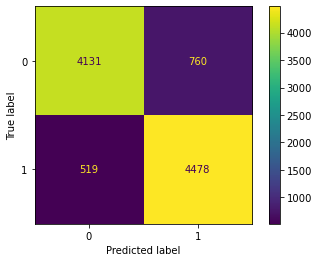

In [5]:
cm = confusion_matrix(y_test, y_knn_pred)
disp = ConfusionMatrixDisplay(cm);
disp.plot()

Above is our preliminary confusion matrix given by a K-Nearest-Neighbors Classifier. As shown below, it has an accuracy of 87.07%, which is not bad, but could definitely be improved upon. 

In [12]:
print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_knn_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.8707
Test set precision: 0.8549
Test set recall: 0.8961
Test set fscore: 0.8750


In [ ]:
# Note: The following code was adapted/obtained from this stack overflow thread: 
# https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

In [7]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

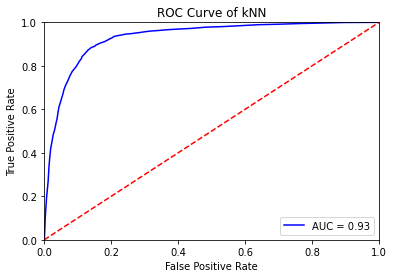

In [8]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Above is the ROC curve plotted for our preliminary K-Nearest-Neighbors Classifier using 100 neighbors. The area under the ROC curve, known as the AUC, is 0.93. This score is relatively close to the maximum of 1, although it is not quite ideal.

In [ ]:
# Note: GridSearch on various params in forest

In [13]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_forest_pred = rand_forest.predict(X_test)

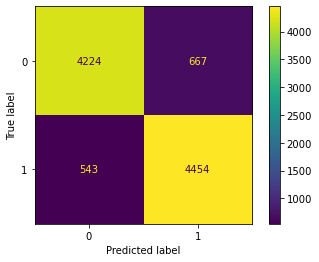

In [14]:
cm = confusion_matrix(y_test, y_forest_pred)
disp = ConfusionMatrixDisplay(cm);
disp.plot()

Above is our preliminary confusion matrix given by a Random Forest Classifier. As shown below, it has an accuracy of 87.76% which is only .69% greater than the accuracy of our preliminary K-Nearest Neighbors Classifier. The recall and f-score are also slightly improved, although the recall is barely reduced.  

In [15]:
print("Test set accuracy: {:.4f}".format(rand_forest.score(X_test, y_test)))
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_forest_pred, average='binary')
print("Test set precision: {:.4f}".format(precision))
print("Test set recall: {:.4f}".format(recall))
print("Test set fscore: {:.4f}".format(fscore))

Test set accuracy: 0.8776
Test set precision: 0.8698
Test set recall: 0.8913
Test set fscore: 0.8804


In [16]:
y_scores = rand_forest.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

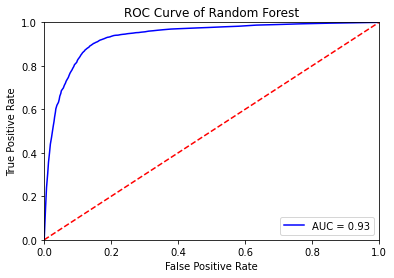

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

Above is the ROC curve plotted for our preliminary Random Forest Classifier. The area under the ROC curve, known as the AUC, is 0.93. This is the same score achieved by our preliminary K-Nearest-Neighbors model, showing that the two classiefiers are yet to yield significantly different results from one another and require further tweaking of hyperparameters to improve.

# Ethics & Privacy

Given that our data and results is solely related to stars, we do not forsee potential ethical issues that would result in negative outcomes for other people. The dataset we are using is also public, so there should be no privacy concerns with the data either.

One potential concern could be the use of our results in the future. If the decisions of space travel are dependent upon the classification of stars in the future, the accuracy of our model would be important for deciding where to go. For this reason, we would like to note that we did not have space travel in mind when working on this project, and this model should not be used for decisions that could impact people's lives.

# Team Expectations 

* Respond to project-related messages within 24 hours
* Be respectful and honest with each other
* Meetings should be scheduled to accommodate as many members as possible according to their availabilities
* Cooperate with team members and be willing to help each other
* Team members should try to attend and participate in all meetings
* Openly communicate with other teammates
* Everyone should have exposure to and be involved in every part of the project
* Give constructive feedback, but do not attack team members or rip apart their code

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Complete During Meeting  | |
|---|---|---|---|
| 2/21  |  10 AM |  Find datasets | Finish Project Proposal |
| 2/25  |  10 AM |  Solidify datasets |
| 2/28  | 10 AM  | Data cleaning with pandas, plan analysis methods |
| 3/4  | 10 AM  | Algorithm analysis using methods from previous meeting |
| 3/7  | 10 AM  | Split and organize analysis into sections to prepare for final project submission|
| 3/11  | 10 AM  | Write-up final project |
| 3/14  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="absmag"></a>1.[^](#absmag):  (Undated) Absolute Magnitude. *Swinburne Centre for Astrophysics and Supercomputing*. https://astronomy.swin.edu.au/cosmos/a/Absolute+Magnitude<br> 
<a name="Mahalakshminote"></a>2.[^](#Mahalakshmi):Mahalakshmi G S, Swadesh B, Aswin RRV et al. (29 Aug 2022) Classification and Feature Prediction of Star, Galaxies, Quasars, and Galaxy Morphologies Using Machine Learning, PREPRINT (Version 1) https://doi.org/10.21203/rs.3.rs-1885343/v1<br> 
<a name="Kongnote"></a>3.[^](#Kong):Kong, Linghe, et al. Big Data in Astronomy, ScienceDirect, 2020, https://doi.org/10.1016/C2018-0-04415-1.<br> 
<a name="Wikipedianote"></a>4.[^](#Wikipedia):”Stellar Classification” Wikipedia, The Free Encyclopedia, Wikimedia Foundation, 15 Feb 2023, https://en.wikipedia.org/wiki/Stellar_classification<br> 
<a name="Saifuddin"></a>5.[^](#Saifuddin):Saifuddin, Mohammed. (25 Dec 2022) Stellar Classification: A Machine Learning Approach. https://towardsdatascience.com/stellar-classification-a-machine-learning-approach-5e23eb5cadb1